# WESAD PREPROCESSING WHOLE DATASET

In [1]:
#imports
import neurokit2 as nk
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
from scipy import signal

In [2]:
filenames = ['S2.pkl', 'S3.pkl', 'S4.pkl', 'S5.pkl', 'S6.pkl', 'S7.pkl', 'S8.pkl', 'S9.pkl', 'S10.pkl', 'S11.pkl', 'S13.pkl', 'S14.pkl', 'S15.pkl', 'S16.pkl', 'S17.pkl']
sample_rate = 130

In [3]:
def preprocess_probant():
    for i in filenames:
        wesad_probant = pd.read_pickle('wesad_dataset/' + i)
        #print(wesad_probant)

        ecg_data = wesad_probant['signal']['chest']['ECG'].flatten()

        data_stress = np.empty(1)
        data_non_stress = np.empty(1)

        stress_indexes = np.where(wesad_probant['label'] == 2)
        #print(stress_indexes)
        data_stress = ecg_data[stress_indexes[0]]

        non_stress_indexes = np.where((wesad_probant['label'] == 1) | (wesad_probant['label'] == 3) | (wesad_probant['label'] == 4))
        #print(non_stress_indexes)
        data_non_stress = ecg_data[non_stress_indexes[0]]

        data_stress = signal.decimate(data_stress, 5)
        data_non_stress = signal.decimate(data_non_stress, 5)

        # Process stress ecg
        ecg_signals_stress, info = nk.ecg_process(data_stress, sampling_rate=sample_rate)
        # segment stress data
        epochs_stress = nk.epochs_create(ecg_signals_stress, 
                                sampling_rate=sample_rate, 
                                epochs_start=0, 
                                epochs_end=60)
        # Analyze stress signal
        result_stress = nk.ecg_intervalrelated(epochs_stress)


        # Process non-stress ecg
        ecg_signals_non_stress, info = nk.ecg_process(data_non_stress, sampling_rate=sample_rate)
        # segment non-stress data
        epochs_non_stress = nk.epochs_create(ecg_signals_non_stress, 
                                sampling_rate=sample_rate, 
                                epochs_start=0, 
                                epochs_end=60)
        # Analyze non-stress ecg
        result_non_stress = nk.ecg_intervalrelated(epochs_non_stress)

        #drop all NaN values 
        result_stress = result_stress.dropna(axis=1,how='all')
        result_non_stress = result_non_stress.dropna(axis=1,how='all')

        result_stress = result_stress.drop(columns=['Label'])
        result_non_stress = result_non_stress.drop(columns=['Label'])

        result_stress.insert(0, 'Stress', 1)
        result_non_stress.insert(0, 'Stress', 0)

        result_probant = pd.concat([result_stress, result_non_stress], ignore_index=True)
        result_probant = result_probant.dropna(axis=1)

        if i == filenames[0] :
            results_summary = result_probant
        else :
            results_summary = pd.concat([results_summary, result_probant], ignore_index=True)

    results_summary = results_summary.dropna(axis=1)
    return results_summary

In [4]:
result = preprocess_probant()

c:\Users\user1\anaconda3\envs\neurokit\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\user1\anaconda3\envs\neurokit\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\user1\anaconda3\envs\neurokit\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum du

In [5]:
result

,Stress,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,...,HRV_MFDFA_alpha1_Fluctuation,HRV_MFDFA_alpha1_Increment,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,1,76.672601,101.613333,6.517945,5.049752,5.083330,0.064145,0.049696,101.0,5.9304,...,0.001003,0.109387,0.633423,2.379546,4.408001,1.312553,2.049637,1.840034,2.708625,0.830509
1,1,72.671496,107.333333,10.116226,6.903765,6.952382,0.094251,0.064321,107.0,11.1195,...,0.002773,0.238613,0.608648,1.088760,4.819114,1.021394,1.570536,1.735452,2.716418,0.685547
2,1,72.572886,107.619718,11.776934,5.086396,5.122132,0.109431,0.047263,107.0,13.3434,...,0.000521,0.136639,0.581743,0.993252,4.918396,0.810584,1.645758,1.551362,1.948420,0.779545
3,1,76.767246,101.631579,9.741789,4.963869,4.997224,0.095854,0.048842,100.0,7.4130,...,0.000526,0.061886,0.526085,1.314321,4.645761,0.821634,1.609420,1.452891,2.229808,0.657677
4,1,71.786225,108.859155,14.364933,6.906519,6.940161,0.131959,0.063445,106.0,13.3434,...,0.001608,0.229350,0.614523,1.461518,5.103766,0.858275,1.620041,1.672899,1.945553,0.779545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0,53.666921,145.769231,19.095853,18.395438,18.577427,0.131001,0.126196,148.5,21.4977,...,0.002027,0.250609,0.224564,1.223775,5.286790,1.236441,1.990393,1.827520,3.456253,1.205862
789,0,57.272078,136.578947,22.691996,15.059999,15.192434,0.166146,0.110266,141.0,23.7216,...,0.000748,0.093769,0.599575,1.450833,5.034473,0.933104,1.548678,1.703951,1.957387,0.818651
790,0,57.033247,136.490909,24.622989,19.919746,20.106365,0.180400,0.145942,144.0,26.6868,...,0.011574,1.103918,0.510421,1.609438,5.258544,0.945031,1.747185,1.813548,2.315452,0.946041
791,0,52.105632,149.745098,19.212333,19.254090,19.449568,0.128300,0.128579,154.0,8.8956,...,0.001673,0.138957,0.603912,1.214444,4.778119,0.943124,1.539687,1.802956,2.734402,1.001016


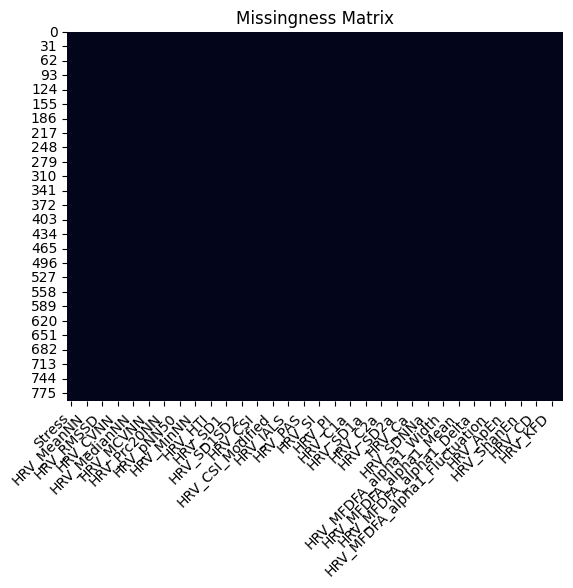

In [6]:
#Missingness Matrix
df = pd.DataFrame(result)

chart = sb.heatmap(df.isna(), cbar=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Missingness Matrix')
plt.show()

In [7]:
result.to_csv('output_preprocessing/wesad_preprocessing.csv', index=False,)